In [67]:
import pandas as pd
import plotly.express as px
# So this isn't stratified
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [3]:
stroke_df = pd.read_csv("./Data/healthcare-dataset-stroke-data.csv")

# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [4]:
stroke_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
stroke_df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
stroke_df.duplicated().value_counts()

False    5110
dtype: int64

In [8]:
stroke_df = stroke_df.dropna(axis=0)

In [9]:
stroke_df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [10]:
print(stroke_df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [11]:
# This is how many (rows, columns) there are
stroke_df.shape

(4909, 12)

In [12]:
clean_stroke_df = pd.get_dummies(stroke_df, columns=['gender','ever_married','work_type','Residence_type','smoking_status']) #Other columns here
clean_stroke_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [13]:
clean_stroke_df = clean_stroke_df.drop(['id'], axis=1)
clean_stroke_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [14]:
print(clean_stroke_df.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [15]:
feature_columns = list(clean_stroke_df.columns)
feature_columns.remove('stroke')
y_column = 'stroke'


In [16]:
X = clean_stroke_df[feature_columns]
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [17]:
y = clean_stroke_df[y_column]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [65]:
# undersample = RandomUnderSampler(sampling_strategy='majority')
# X_over, y_over = undersample.fit_resample(X, y)

# undersample = RandomUnderSampler(sampling_strategy=0.75)
# X_over, y_over = undersample.fit_resample(X, y)

In [85]:
over = SMOTE(sampling_strategy=0.1)
X_smote, y_smote = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy=0.8)
X_over, y_over = under.fit_resample(X_smote, y_smote)

X_train, X_test, y_train, y_test = train_test_split(
     X_over, y_over, test_size=0.2, random_state=42, stratify=y_over)


In [109]:
y_over.value_counts()

0    587
1    470
Name: stroke, dtype: int64

In [70]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=0.2, random_state=42, stratify=y)

# X_train, X_test, y_train, y_test = train_test_split(
#      X_over, y_over, test_size=0.2, random_state=42, stratify=y_over)

X_train, X_test, y_train, y_test = train_test_split(
     X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

In [32]:
# scaler = StandardScaler()
# # scaler.fit(X_train, y_train)
# X_train = pd.DataFrame(scaler.fit_transform(X_train, y_train), columns=X.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Accuracy: 0.7877358490566038
Precision: 0.7578947368421053
Recall: 0.7659574468085106
F1 Score: 0.761904761904762


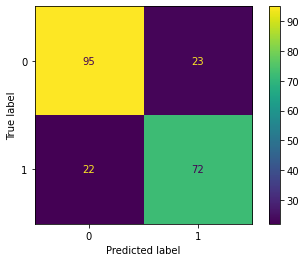

In [87]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))
print("F1 Score:", metrics.f1_score(y_test, y_pred_tree))
cm = confusion_matrix(y_test, y_pred_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

In [104]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# tree_clf = tree.DecisionTreeClassifier()
# tree_clf = tree_clf.fit(X_train, y_train)
# y_pred_tree = tree_clf.predict(X_test)
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
# print("Precision:", metrics.precision_score(y_test, y_pred_tree))
# print("Recall:", metrics.recall_score(y_test, y_pred_tree))
# print("F1 Score:", metrics.f1_score(y_test, y_pred_tree))
# cm = confusion_matrix(y_test, y_pred_tree, labels=tree_clf.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
# disp.plot()


from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
parameters = {'criterion' :['gini', 'entropy'],
              'max_features' :['sqrt', 'log2'],
              'max_depth' :range(10,30,2),
              'min_samples_split' :range(2,10),
              'min_samples_leaf' :range(1,10)} 
gs_dt = GridSearchCV(tree.DecisionTreeClassifier(), parameters, scoring='f1')
gs_dt.fit(X_train, y_train)
gs_dt.best_params_

{'criterion': 'gini',
 'max_depth': 22,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [105]:
gs_dt.best_score_

0.7792069289541018

Accuracy: 0.7264150943396226
Precision: 0.6875
Recall: 0.7021276595744681
F1 Score: 0.6947368421052632


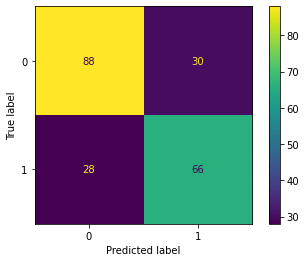

In [108]:
tree_clf = tree.DecisionTreeClassifier(**gs_dt.best_params_)
tree_clf = tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))
print("F1 Score:", metrics.f1_score(y_test, y_pred_tree))
cm = confusion_matrix(y_test, y_pred_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()




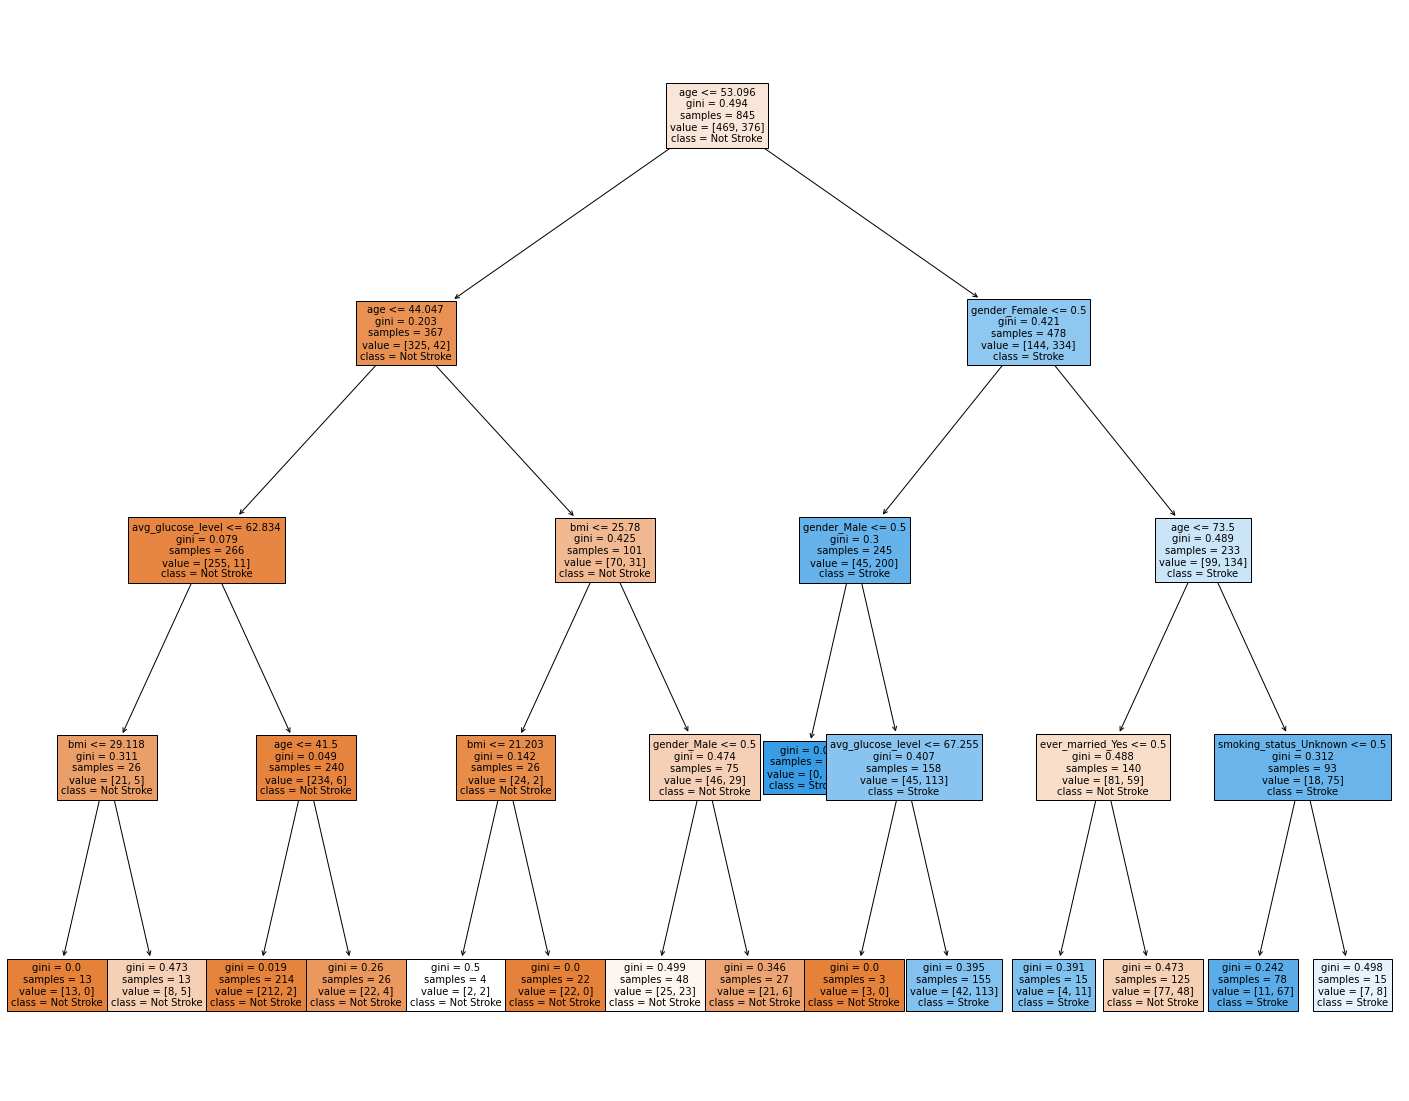

In [98]:
from matplotlib import pyplot as plt
tree_clf = tree.DecisionTreeClassifier(max_depth=4)
tree_clf = tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=feature_columns,  
                   class_names=['Not Stroke','Stroke'],
                   filled=True, fontsize=10)


Testing-set Accuracy score is: 0.8066037735849056
Precision: 0.7676767676767676
Recall: 0.8085106382978723
F1 Score: 0.7875647668393781


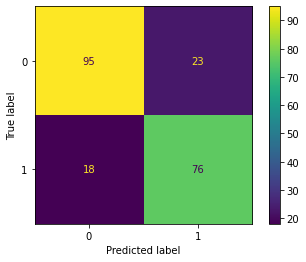

In [102]:

clf_rf = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 250, max_depth=20, criterion='gini')
clf_rf = clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc_rf)
print("Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Recall:", metrics.recall_score(y_test, y_pred_rf))
print("F1 Score:", metrics.f1_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

In [31]:
clf_rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [150, 200, 250, 300, 350, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7, 10, 11, 15, 20, 25, 30],
    'criterion' :['gini', 'entropy']}
clf_rf_gs = GridSearchCV(clf_rf, param_grid)
clf_rf_gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 11, 15, 20, 25,
                                       30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [150, 200, 250, 300, 350, 400]},
             scoring='f1')

In [32]:
print(clf_rf_gs.best_params_)

{'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}


KNN Model Acuuracy is: 0.7547169811320755
Precision: 0.6810344827586207
Recall: 0.8404255319148937
F1 Score: 0.7523809523809525


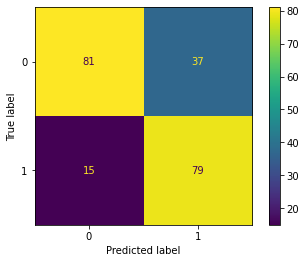

In [99]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = metrics.accuracy_score(y_test,y_pred_knn)
print("KNN Model Acuuracy is:", acc_knn)
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1 Score:", metrics.f1_score(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [44]:
# Support Vector Classifier 
svc = SVC(random_state = 777)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
print("SVC Accuracy score is:", acc_svc)
print("Precision:", metrics.precision_score(y_test, svc_pred))
print("Recall:", metrics.recall_score(y_test, svc_pred))
print("F1 Score:", metrics.f1_score(y_test, svc_pred))
cm = confusion_matrix(y_test, svc_pred, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = stroke_df()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)


sorted(clf.cv_results_.keys())

SVC Accuracy score is: 0.9572301425661914
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'clf' is not defined

In [0]:
svc_pred

Accuracy: 0.8018867924528302
Precision: 0.7452830188679245
Recall: 0.8404255319148937
F1 Score: 0.79


/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


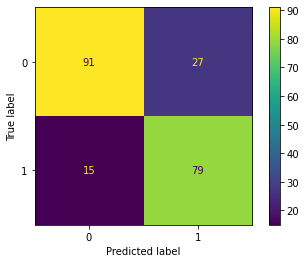

In [101]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train,y_train)
y_pred_lr = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:", metrics.precision_score(y_test, y_pred_lr))
print("Recall:", metrics.recall_score(y_test, y_pred_lr))
print("F1 Score:", metrics.f1_score(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

In [0]:
list(set(y_pred_lr))